In [20]:
import os
import numpy as np
import random
from IPython.display import HTML

from HMM import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission
)

In [21]:
text = open(os.path.join(os.getcwd(), 'data/shakespeare_proc.txt')).read()

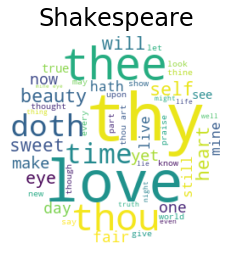

In [22]:
wordcloud = text_to_wordcloud(text, title='Shakespeare')

In [23]:
syl = {}
f = open('./data/Syllable_dictionary.txt', 'r')
for line in f:
    new_line = line[:-1]
    line_lst = list(new_line.split(" "))
    syl[line_lst[0]] = line_lst[1:]
f.close()

In [24]:
obs, obs_map = parse_observations(text)
emission_map = {v: k for k, v in obs_map.items()}

In [27]:
def get_obs(O, state):
    rand_var = random.uniform(0, 1)
    next_obs = 0

    while rand_var > 0:
        rand_var -= O[state][next_obs]
        next_obs += 1

    next_obs -= 1
    return next_obs

In [28]:
def generate_line(hmm):
    # get the transition and emission matrices
    A = hmm.A
    O = hmm.O
    L = hmm.L
    # pick a random start state
    state = np.random.choice(L)
    words = []
    syllables = 0
    # while haven't finished line
    while syllables < 10:
        # Sample next observation.
        next_obs = get_obs(O, state)
        m = len(words)
        
        # check if word can be added without going over syllable count
        word = emission_map[next_obs]
        syls = syl[word]
        if syls[0][0] == 'E':
            n = int(syls[0][1])
            if n + syllables == 10:
                words.append(word)
                syllables += n
            else:
                n = int(syls[1])
                if n + syllables <= 10:
                    words.append(word)
                    syllables += n
        else:
            n = int(syls[0])
            if n + syllables <= 10:
                words.append(word)
                syllables += n
        
        # Sample next state.
        rand_var = random.uniform(0, 1)
        next_state = 0

        while rand_var > 0:
            rand_var -= A[state][next_state]
            next_state += 1

        next_state -= 1
        state = next_state
    
    return ' '.join(words)

In [30]:
# train HMMs
hmms = []
num_states = [20]

for num in num_states:
    print("Training HMM with %d states for 100 iterations" % num)
    hmm = unsupervised_HMM(obs, num, 100)
    hmms.append(hmm)
    print("================================================")

Training HMM with 20 states for 100 iterations
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100


In [39]:
def generate_sonnet(hmm):
    lines = []
    for i in range(14):
        line = generate_line(hmm)
        line = line.capitalize()
        if i == 13:
            line += '.'
        elif i % 4 == 3:
            line += ':'
        else:
            line += ','
        lines.append(line)
    
    return lines

In [46]:
sonnet = generate_sonnet(hmms[0])

In [47]:
for line in sonnet:
    print(line, end='\n')

Single dies that some feil drowns mine and of,
That pattern of near you thy be report,
I before leads thine eyes will the west each,
To o wherein thy complexion fell where:
Store of my with razed false your come they my,
One to thee praise due behind the the show,
Sad writes provide control that as and art,
Best whence she time's and sour art to wills can:
To there still of so victors thy spirit for,
His messengers wealth lives thou lend in on,
All your quest and love fly of their gentle,
Then most mine of that couplement see choose:
Resembling thus at height torment that but,
The strange cheeks lips i upon my youth rest.
